<a href="https://colab.research.google.com/github/menachem658/covid-19/blob/main/ReadElectionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Israel Elections Data Analysis**

1.  Idan Keipour 315355537

2.  Menachem Sokolik 314696972

3.  Maria Moldvova 345232821


*code form the class notebook*

In [139]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)
import io

In [140]:
df_2021_raw = pd.read_csv('votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2021
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns

In [141]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]


In [142]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes = df.loc[city,names] / df.loc[city,names].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='gray')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='pink')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2021')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax

*Question 1.*

*ploting the histogram:*



Text(0.5, 1.0, 'Invalid Votes per City 2021')

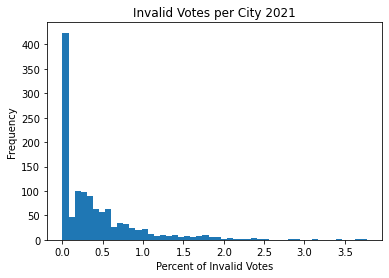

In [143]:
from matplotlib import pyplot as plt

df_2021_Invalid = df_2021_raw
df_2021_Invalid['Invalid Votes Percent'] = (df_2021_raw['פסולים']/df_2021_raw['מצביעים'])*100
plt.hist(df_2021_Invalid['Invalid Votes Percent'], bins = 50)
plt.xlabel('Percent of Invalid Votes')
plt.ylabel('Frequency')
plt.title('Invalid Votes per City 2021')

ניתן לראות שאחוז הקולות הפסולים במרבית מהיישובים הוא אפסי

*:מציאת שלושת הערים בעלי אחוז הקולות הפסולים הגבוה ביותר*

In [144]:
top_3 = df_2021_Invalid.nlargest(3, 'Invalid Votes Percent')
round(top_3[['Invalid Votes Percent']],3)

,Invalid Votes Percent
שם ישוב,
סואעד חמרייה,3.774
ניין,3.649
מאיר שפיה,3.448


*Question 2.*

In [145]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar_pass(df, thresh, city_1, city_2):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_1_votes = df.loc[city_1,names]/df.loc[city_1,names].sum()
    city_2_votes = df.loc[city_2,names]/df.loc[city_2,names].sum()
    city_1_bar = ax.bar(np.arange(n), list(city_1_votes), width, color='gray')
    city_2_bar = ax.bar(np.arange(n)+width, list(city_2_votes), width, color='pink')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2021')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((city_1_bar[0] , city_2_bar[0]), (city_1[::-1], city_2[::-1]))
    plt.show()

    return fig, ax  

*Finding the large cities that are ovre 50,000 voters.*

In [146]:
#large_cities = df_2021_raw.nlargest(6, ['מצביעים'])

*השוואה בין שתי ערים בעלי מספר מצביעים גבוה מ-50,000*



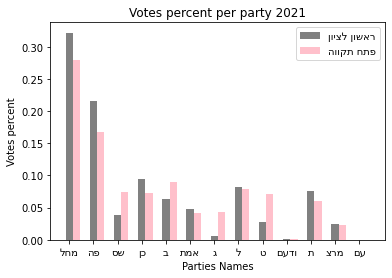

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f82960ddc50>)

In [147]:
party_bar_pass(df_2021, 0.0325,'ראשון לציון','פתח תקווה')

*השוואה בין שתי ערים בעלי מספר מצביעים בין 5000 ל- 50,000*



In [148]:
df_2021_Medium_cities = df_2021_raw[(df_2021_raw['מצביעים'] >= 5000) & (df_2021_raw['מצביעים'] < 50000)]
# df_2021_Medium_cities.sort_values('מצביעים',ascending=False)


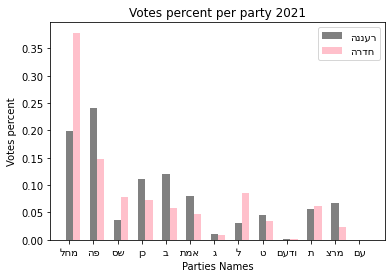

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8295fffe50>)

In [149]:
party_bar_pass(df_2021, 0.0325,'רעננה','חדרה')

*השוואה בין שתי ערים בעלי מספר מצביעים הקטן מ-5,000*

In [150]:
df_2021_Small_towns = df_2021_raw[(df_2021_raw['מצביעים'] < 5000)]
# df_2021_Small_towns.sort_values('מצביעים', ascending=False)

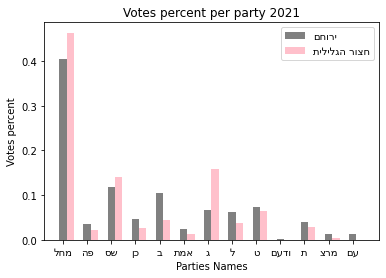

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8295eebfd0>)

In [151]:
party_bar_pass(df_2021, 0.0325,'ירוחם','חצור הגלילית')

תחילה יצרנו פונקציה אשר מקבלת את הדטאה ואת שמות הערים אשר מציגה באופן גרפי את השוואה בין השתים, פונקציה זו נבנתה על בסיס הפונקציה אשר ראינו בכיתה.
לאחר מכן, בעזרת חיתוך הדטאה על פי אותן אמות מידה שנתבקשנו בשאלה ומייונם קיבלנו את הערים הזהות לפי שיעור הצבעה, לא הראנו כאן את טבלאות הנתונים היות ואין רלוונטי פרט לכן לשמות הערים.

ניתן לראות שבאופן כללי כאשר מתבוננים בהשוואה בין שתי ערים עם כמות מצביעים דומה- ההצבעה עבור רוב המפלגות היא מסדר גודל דומה.
המפלגה שבולטת באופן חריג היא מפלגת יהדות התורה. ההבדל נובע מכך שזו מפלגה סקטוריאלית המזוהה עם פלג בציבור החרדי שמאופיין במגורים סמוכים של חברי הקהילה. לכן ייתכנו ערים בהם יהיה שיעור חרדים נמוך (ולפיכך שיעור הצבעה נמוך למפלגת יהדות התורה) וערים בהם שיעור החרדים הוא גבוה.

בנוסף ניתן לראות שלמרות שמספר התושבים בערים חדרה ורעננה הוא דומה, ישנו פער מסוים בין מספר המצביעים למפלגת הליכוד בין הערים הללו.
ייתכן שזה נובע מכך שרעננה מאופיינת באוכלוסיה בורגנית יותר המזוהה עם מפלגות השמאל-מרכז אשר מסביר את השיעור הצבעה הגדול יותר למפלגות אלו, לעומת חדרה שזו עיר פרפיפרילית אשר אנשיה מזוהים עם מפלגה ימנית סקטוריאליות כמו הליכוד ש"ס וישראל ביתינו.


*Question 3*

In [152]:
# Calculation of the distribution of the national vote.
Distribution_of_the_national_vote = df_2021.sum().div(df_2021_raw['כשרים'].sum())

# Creating to dataframe.
cities = pd.DataFrame()
difference = pd.DataFrame()

# Calculation of the distribution of vote each city. 
for i in list(df_2021.columns):
  cities[i] = df_2021[i].div(df_2021_raw['כשרים'])
  difference[i] = (cities.loc[:,i] - Distribution_of_the_national_vote[i])**2

difference_sum = difference.sum(1) # sum for difference by cities (the rowname).

# to clean non-cities votes.
difference_sum = difference_sum.drop('מעטפות חיצוניות') 

תחילה נחשב את שיעור הצבעה בישראל לכל מפלגה, לאחר מכן מחשבים את שיעור לכל מפלגה לפי עיר ועיר.
נבצע חישוב של המרחק הריבועים לכל עיר ועיר ביחס לשיעור הארצי כפי שנתבקשנו בהוראות השאלה. 

*The two cities with the lowest gap between israel distribution*

In [153]:
# to get the smallest cite in difference.
difference_sum.nsmallest(2)

שם ישוב
רחובות       0.006598
פתח תקווה    0.008164
dtype: float64

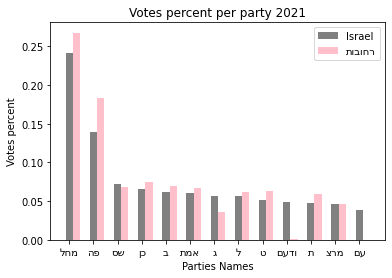

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8295e40a50>)

In [154]:
party_bar(df_2021, 0.0325, 'רחובות')

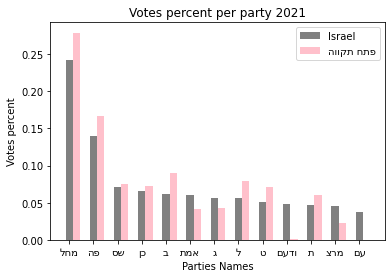

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8295d6a490>)

In [155]:
party_bar(df_2021, 0.0325, 'פתח תקווה')

ניתן לראות כי הערים פתח תקווה ורחובות הם בעלי המרחק הריבועי הקטן ביותר, על כן מיצגים במידת רבה את השיעור הארצי לכל מפלגה ומפלגה.

ניתן להניח כי היות וערים אלו הטרוגניות באופן יחסי על כן ייצגו את התפלגות הארצי, אם כי אינן משקפות את שיעור הצבעה לפלגות הערביות. היות ואינן מאוכלסות עם מגזר זה ברובו, אשר מסביר במידת מה את ההפרש בין תוצאות הארצי.


*The two cities with the highest gap between israel distribution*

In [156]:
# to get the latgest cite in difference.
difference_sum.nlargest(2)

שם ישוב
ביר הדאג    0.961703
נווה        0.959133
dtype: float64

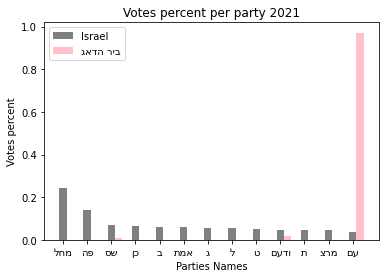

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8295cd7490>)

In [157]:
party_bar(df_2021, 0.0325, 'ביר הדאג')

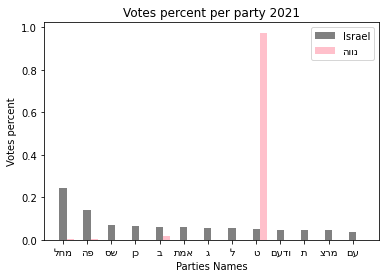

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8295c9a750>)

In [158]:
party_bar(df_2021, 0.0325, 'נווה')

ניתן לראות שהערים בהם המרחק הריבועי הוא הגבוה ביותר מאופיינות בכך שהאוכלוסיה בהן אינה מגוונת. היישוב נווה הוא יישוב שמאוכלס באופן מובהק ע"י אוכלוסיה ציונית דתית (זהו יישוב שהוקם ע"י מפוני גוש קטיף) ולכן ההצבעה למפלגה המייצגת את האוכלוסיה הזו זכתה לרוב מוחלט של הקולות ביישוב.
באופן זהה , ניתן לראות כי כפר בית הדאג יצביעו למפלגת רעם היות והתושבים הינם בדואים ויש להם יצוג רב במפלגה זו. 